# Kobe Bryant Shot Selection

## __数据准备__

In [177]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import sklearn 
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

In [92]:
data = pd.read_csv('/Users/aeternae/Desktop/学期__2/综合训练/科比投篮预测/data.csv')

In [93]:
data.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [94]:
data.dtypes

action_type            object
combined_shot_type     object
game_event_id           int64
game_id                 int64
lat                   float64
loc_x                   int64
loc_y                   int64
lon                   float64
minutes_remaining       int64
period                  int64
playoffs                int64
season                 object
seconds_remaining       int64
shot_distance           int64
shot_made_flag        float64
shot_type              object
shot_zone_area         object
shot_zone_basic        object
shot_zone_range        object
team_id                 int64
team_name              object
game_date              object
matchup                object
opponent               object
shot_id                 int64
dtype: object

In [95]:
data['action_type']=data['action_type'].astype('category')
data['combined_shot_type']=data['combined_shot_type'].astype('category')
data['season']=data['season'].astype('category')
data['shot_type']=data['shot_type'].astype('category')
data['shot_zone_area']=data['shot_zone_area'].astype('category')
data['shot_zone_basic']=data['shot_zone_basic'].astype('category')
data['shot_zone_range']=data['shot_zone_range'].astype('category')
data['team_name']=data['team_name'].astype('category')
data['game_date']=data['game_date'].astype('category')
data['matchup']=data['matchup'].astype('category')
data['opponent']=data['opponent'].astype('category')
data['game_event_id']=data['game_event_id'].astype('category')
data['game_id']=data['game_id'].astype('category')
data['period']=data['period'].astype('category')
data['playoffs']=data['playoffs'].astype('category')
data['shot_made_flag']=data['shot_made_flag'].astype('category')
data['team_id']=data['team_id'].astype('category')
data['shot_id']=data['shot_id'].astype('category')


In [96]:
data.shape

(30697, 25)

In [97]:
data.describe(include=[np.number])

,lat,loc_x,loc_y,lon,minutes_remaining,seconds_remaining,shot_distance
count,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000
mean,33.953192,7.110499,91.107535,-118.262690,4.885624,28.365085,13.437437
std,0.087791,110.124578,87.791361,0.110125,3.449897,17.478949,9.374189
min,33.253300,-250.000000,-44.000000,-118.519800,0.000000,0.000000,0.000000
25%,33.884300,-68.000000,4.000000,-118.337800,2.000000,13.000000,5.000000
50%,33.970300,0.000000,74.000000,-118.269800,5.000000,28.000000,15.000000
75%,34.040300,95.000000,160.000000,-118.174800,8.000000,43.000000,21.000000
max,34.088300,248.000000,791.000000,-118.021800,11.000000,59.000000,79.000000


## __探索性数据分析__

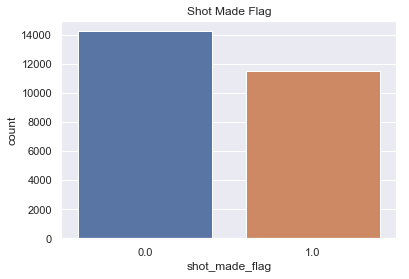

In [98]:
ax=plt.axes()
sns.set(style="darkgrid")
sns.countplot(x='shot_made_flag',data=data,ax=ax)
ax.set_title('Shot Made Flag')
plt.show()

In [99]:
loc_x_made=data[data['shot_made_flag']==1]['loc_x'].values.tolist()
loc_y_made=data[data['shot_made_flag']==1]['loc_y'].values.tolist()
loc_x_miss=data[data['shot_made_flag']==0]['loc_x'].values.tolist()
loc_y_miss=data[data['shot_made_flag']==0]['loc_y'].values.tolist()

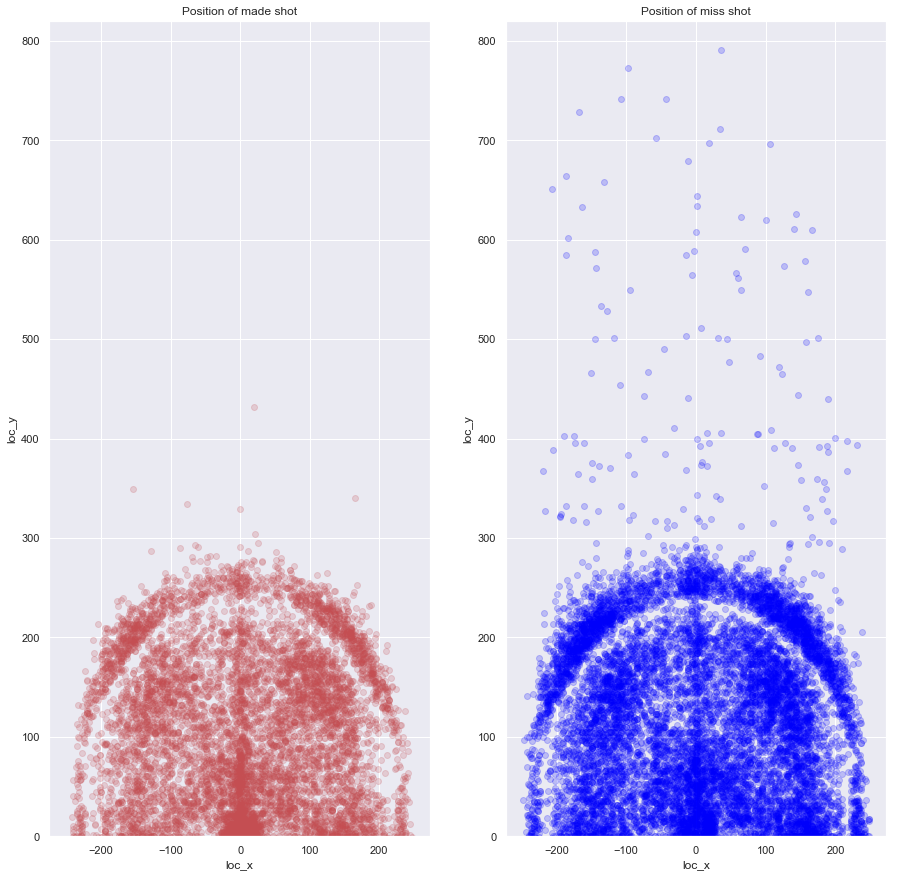

In [100]:
fig,((ax1,ax2))=plt.subplots(1,2,figsize=(15,15))
ax1.scatter(loc_x_made, loc_y_made, c='r', alpha=0.2)
ax1.set_ylim(0, 820)
ax2.scatter(loc_x_miss, loc_y_miss, c='blue', alpha=0.2)
ax2.set_ylim(0, 820)
ax1.set_title('Position of made shot')
ax1.set_xlabel('loc_x')
ax1.set_ylabel('loc_y')
ax2.set_title('Position of miss shot')
ax2.set_xlabel('loc_x')
ax2.set_ylabel('loc_y')
plt.show()

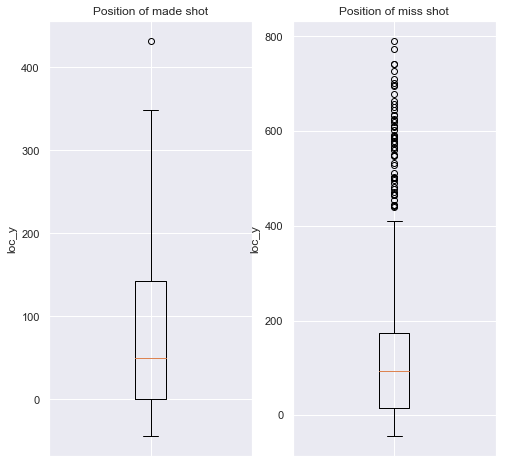

In [101]:
fig,((ax1,ax2))=plt.subplots(1,2,figsize=(8,8))
ax1.boxplot(loc_y_made)
ax2.boxplot(loc_y_miss)
ax1.set_title('Position of made shot')
ax1.set_xticklabels('')
ax1.set_ylabel('loc_y')
ax2.set_title('Position of miss shot')
ax2.set_xticklabels('')
ax2.set_ylabel('loc_y')
plt.show()

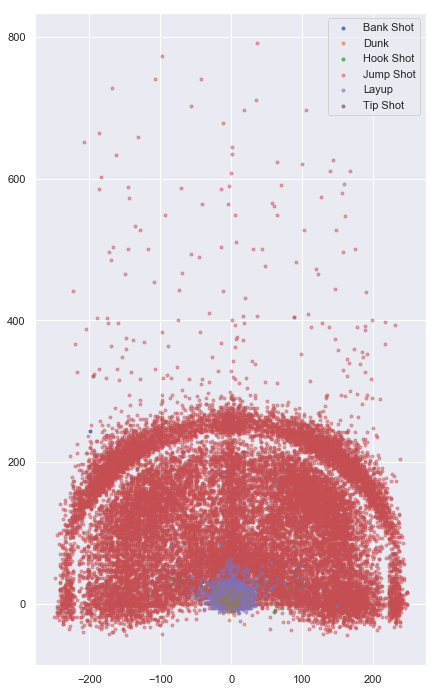

In [102]:
groups = data.groupby('combined_shot_type')
fig, ax = plt.subplots(figsize=(7, 12))

alphas, n = [], float(len(data.combined_shot_type))
for u in [i[0] for i in groups]:
    d = len(data.loc[data.combined_shot_type == u, 'combined_shot_type'])
    alphas.append(2 / np.log10(d))
for (name, group), alp in zip(groups, alphas):
    ax.scatter(group.loc_x, group.loc_y, marker='.',label=name, alpha=alp)
ax.legend()
plt.show()

## __特征工程__

### __删除冗余特征__

一些属性只包含唯一值，不具有预测的能力，故删去

In [103]:
len(np.unique(data.shot_id))-len(data.shot_id)

0

In [104]:
len(np.unique(data.team_id))

1

In [105]:
len(np.unique(data.team_name))

1

In [106]:
del data['shot_id']
del data['team_id']
del data['team_name']

In [107]:
data.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,game_date,matchup,opponent
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,27,18,NaN,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,2000-10-31,LAL @ POR,POR
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,22,15,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,2000-10-31,LAL @ POR,POR
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,45,16,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,2000-10-31,LAL @ POR,POR
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,52,22,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,2000-10-31,LAL @ POR,POR
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,19,0,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,2000-10-31,LAL @ POR,POR


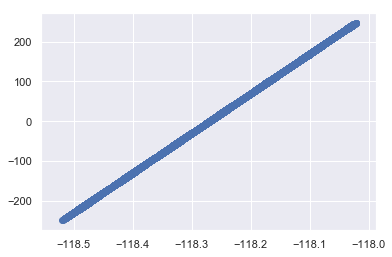

In [108]:
plt.scatter(data['lon'],data['loc_x'])

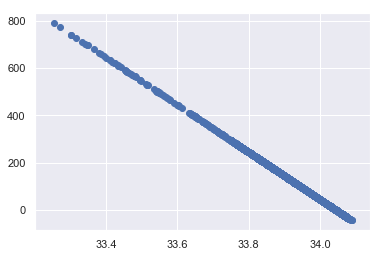

In [109]:
plt.scatter(data['lat'],data['loc_y'])

In [110]:
del data['lon']
del data['lat']

In [111]:
data.head()

,action_type,combined_shot_type,game_event_id,game_id,loc_x,loc_y,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,game_date,matchup,opponent
0,Jump Shot,Jump Shot,10,20000012,167,72,10,1,0,2000-01,27,18,NaN,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,2000-10-31,LAL @ POR,POR
1,Jump Shot,Jump Shot,12,20000012,-157,0,10,1,0,2000-01,22,15,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,2000-10-31,LAL @ POR,POR
2,Jump Shot,Jump Shot,35,20000012,-101,135,7,1,0,2000-01,45,16,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,2000-10-31,LAL @ POR,POR
3,Jump Shot,Jump Shot,43,20000012,138,175,6,1,0,2000-01,52,22,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,2000-10-31,LAL @ POR,POR
4,Driving Dunk Shot,Dunk,155,20000012,0,0,6,2,0,2000-01,19,0,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,2000-10-31,LAL @ POR,POR


In [112]:
del data['game_event_id']
del data['game_id']

In [113]:
np.unique(data['matchup'])

array(['LAL @ ATL', 'LAL @ BKN', 'LAL @ BOS', 'LAL @ CHA', 'LAL @ CHH',
       'LAL @ CHI', 'LAL @ CLE', 'LAL @ DAL', 'LAL @ DEN', 'LAL @ DET',
       'LAL @ GSW', 'LAL @ HOU', 'LAL @ IND', 'LAL @ LAC', 'LAL @ MEM',
       'LAL @ MIA', 'LAL @ MIL', 'LAL @ MIN', 'LAL @ NJN', 'LAL @ NOH',
       'LAL @ NOK', 'LAL @ NOP', 'LAL @ NYK', 'LAL @ OKC', 'LAL @ ORL',
       'LAL @ PHI', 'LAL @ PHO', 'LAL @ PHX', 'LAL @ POR', 'LAL @ SAC',
       'LAL @ SAS', 'LAL @ SEA', 'LAL @ TOR', 'LAL @ UTA', 'LAL @ UTH',
       'LAL @ VAN', 'LAL @ WAS', 'LAL vs. ATL', 'LAL vs. BKN',
       'LAL vs. BOS', 'LAL vs. CHA', 'LAL vs. CHH', 'LAL vs. CHI',
       'LAL vs. CLE', 'LAL vs. DAL', 'LAL vs. DEN', 'LAL vs. DET',
       'LAL vs. GSW', 'LAL vs. HOU', 'LAL vs. IND', 'LAL vs. LAC',
       'LAL vs. MEM', 'LAL vs. MIA', 'LAL vs. MIL', 'LAL vs. MIN',
       'LAL vs. NJN', 'LAL vs. NOH', 'LAL vs. NOK', 'LAL vs. NOP',
       'LAL vs. NYK', 'LAL vs. OKC', 'LAL vs. ORL', 'LAL vs. PHI',
       'LAL vs. PHO', 'LAL vs. 

In [114]:
np.unique(data['opponent'])

array(['ATL', 'BKN', 'BOS', 'CHA', 'CHI', 'CLE', 'DAL', 'DEN', 'DET',
       'GSW', 'HOU', 'IND', 'LAC', 'MEM', 'MIA', 'MIL', 'MIN', 'NJN',
       'NOH', 'NOP', 'NYK', 'OKC', 'ORL', 'PHI', 'PHX', 'POR', 'SAC',
       'SAS', 'SEA', 'TOR', 'UTA', 'VAN', 'WAS'], dtype=object)

In [115]:
matchup_opponent = np.unique([(lambda x : x[-3:])(x) for x in data['matchup']])

In [116]:
matchup_opponent

array(['ATL', 'BKN', 'BOS', 'CHA', 'CHH', 'CHI', 'CLE', 'DAL', 'DEN',
       'DET', 'GSW', 'HOU', 'IND', 'LAC', 'MEM', 'MIA', 'MIL', 'MIN',
       'NJN', 'NOH', 'NOK', 'NOP', 'NYK', 'OKC', 'ORL', 'PHI', 'PHO',
       'PHX', 'POR', 'SAC', 'SAN', 'SAS', 'SEA', 'TOR', 'UTA', 'UTH',
       'VAN', 'WAS'], dtype='<U3')

In [117]:
del data['matchup']

In [118]:
data[['combined_shot_type','action_type']].drop_duplicates().sort_values('combined_shot_type')

,combined_shot_type,action_type
12043,Bank Shot,Running Bank shot
6576,Bank Shot,Hook Bank Shot
12534,Bank Shot,Driving Bank shot
11825,Bank Shot,Turnaround Bank shot
13291,Bank Shot,Pullup Bank shot
312,Dunk,Running Dunk Shot
164,Dunk,Dunk Shot
144,Dunk,Alley Oop Dunk Shot
12001,Dunk,Putback Slam Dunk Shot
13042,Dunk,Putback Dunk Shot


In [119]:
del data['combined_shot_type']

In [120]:
data['shot_made_flag'] = data['shot_made_flag'].apply(lambda x : '' if np.isnan(x) else ('1' if x==1.0 else '0'))

### 增加特征

In [122]:
data['time_remaining']=data['seconds_remaining']/60+data['minutes_remaining']
del data['seconds_remaining'] 
del data['minutes_remaining']
data['game_date']=pd.to_datetime(data['game_date'])
data['year']=data['game_date'].dt.year
data['month']=data['game_date'].dt.month
data['day']=data['game_date'].dt.day
del data['game_date']

In [123]:
data['loc_y_300'] = data['loc_y'].apply(lambda x : '1' if x>300 else '0').astype('category')

In [124]:
category_variable = list(data.select_dtypes(include='category').columns.values)

In [125]:
category_variable

['action_type',
 'period',
 'playoffs',
 'season',
 'shot_made_flag',
 'shot_type',
 'shot_zone_area',
 'shot_zone_basic',
 'shot_zone_range',
 'opponent',
 'loc_y_300']

In [126]:
category_variable.remove('shot_made_flag')

In [127]:
for i in category_variable:
    data_category=pd.get_dummies(data[i])
    data_category = data_category.add_prefix("{}#".format(i))
    data.drop(i,axis=1, inplace=True)
    data=data.join(data_category)
data.shape

(30697, 149)

In [128]:
learning_set= data[data['shot_made_flag'].notnull()]

In [129]:
validation_set=data[data['shot_made_flag'].isnull()]

In [130]:
learning_set.shape

(25697, 149)

In [131]:
validation_set.shape

(5000, 149)

There are 25697 training records and 5000 test records.
<br>There are 141 columns

In [132]:
learning_set.dtypes

loc_x                                             int64
loc_y                                             int64
shot_distance                                     int64
shot_made_flag                                 category
time_remaining                                  float64
year                                              int64
month                                             int64
day                                               int64
action_type#Alley Oop Dunk Shot                   uint8
action_type#Alley Oop Layup shot                  uint8
action_type#Cutting Finger Roll Layup Shot        uint8
action_type#Cutting Layup Shot                    uint8
action_type#Driving Bank shot                     uint8
action_type#Driving Dunk Shot                     uint8
action_type#Driving Finger Roll Layup Shot        uint8
action_type#Driving Finger Roll Shot              uint8
action_type#Driving Floating Bank Jump Shot       uint8
action_type#Driving Floating Jump Shot          

In [134]:
learning_set.head()

,loc_x,loc_y,shot_distance,shot_made_flag,time_remaining,year,month,day,action_type#Alley Oop Dunk Shot,action_type#Alley Oop Layup shot,...,opponent#POR,opponent#SAC,opponent#SAS,opponent#SEA,opponent#TOR,opponent#UTA,opponent#VAN,opponent#WAS,loc_y_300#0,loc_y_300#1
1,-157,0,15,0,10.366667,2000,10,31,0,0,...,1,0,0,0,0,0,0,0,1,0
2,-101,135,16,1,7.750000,2000,10,31,0,0,...,1,0,0,0,0,0,0,0,1,0
3,138,175,22,0,6.866667,2000,10,31,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,1,6.316667,2000,10,31,0,0,...,1,0,0,0,0,0,0,0,1,0
5,-145,-11,14,0,9.533333,2000,10,31,0,0,...,1,0,0,0,0,0,0,0,1,0


## 模型选择

In [135]:
learning_data=learning_set.drop('shot_made_flag',axis=1)
learning_target=learning_set['shot_made_flag']

### Random forest classifier 

In [136]:
X_train,X_test,y_train,y_test = train_test_split(learning_data,learning_target,test_size=0.3,random_state=42)

In [137]:
random_forest_model = RandomForestClassifier(n_estimators=100,min_samples_leaf=50)

In [138]:
random_forest_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [139]:
random_forest_model.score(X_test,y_test)

0.6739299610894942

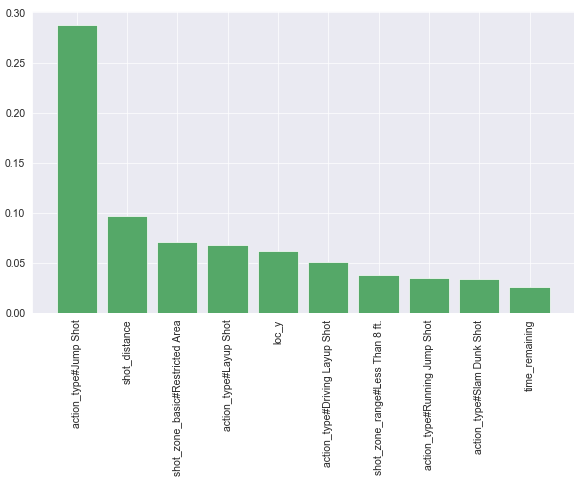

In [172]:
feature = X_train.columns
importances = random_forest_model.feature_importances_
index = np.argsort(importances)[::-1]
feature[index]

plt.figure(figsize = (14, 8), dpi = 50)
plt.bar(feature[index][:10], importances[index][:10], color="g", align="center")
plt.xticks(rotation=90)
plt.tick_params(labelsize=15) 

In [150]:
variables_scores = pd.DataFrame(random_forest_model.feature_importances_, index=X_test.columns, columns=['cum_scores'])


In [146]:
variables_scores.sort_values(by='cum_scores', ascending=False).cumsum().head(20)

,cum_scores
action_type#Jump Shot,0.247087
action_type#Layup Shot,0.338226
shot_distance,0.425884
loc_y,0.481807
shot_zone_basic#Restricted Area,0.536056
action_type#Driving Layup Shot,0.578032
shot_zone_range#Less Than 8 ft.,0.614252
action_type#Slam Dunk Shot,0.648472
time_remaining,0.680141
action_type#Running Jump Shot,0.707866


In [158]:
n_leaf=0
max_result=0
for i in range(10,101):
    random_forest_model = RandomForestClassifier(n_estimators=100,min_samples_leaf=i)
    random_forest_model.fit(X_train,y_train)
    result=random_forest_model.score(X_test,y_test)
    if result>max_result:
        n_leaf=i
        max_result=result
print(n_leaf)
print(max_result)

14
0.6793774319066148


### Logistic Regression

In [176]:
log_reg=LogisticRegression()

In [178]:
log_reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [161]:
log_reg.score(X_test,y_test)

0.6753566796368353

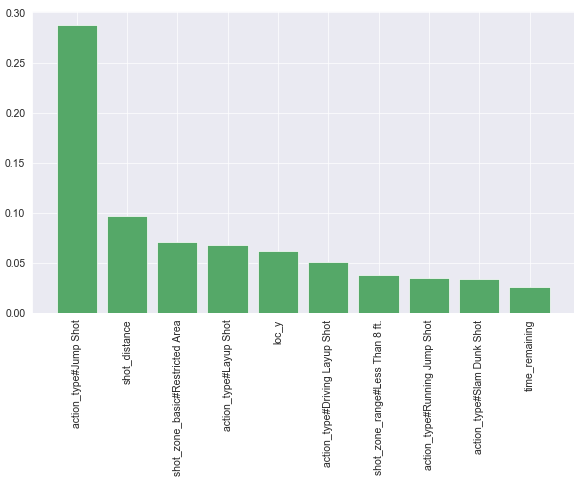

In [173]:
feature = X_train.columns
importances = random_forest_model.feature_importances_
index = np.argsort(importances)[::-1]
feature[index]

plt.figure(figsize = (14, 8), dpi = 50)
plt.bar(feature[index][:10], importances[index][:10], color="g", align="center")
plt.xticks(rotation=90)
plt.tick_params(labelsize=15) 